# Introduction

## Predicting CO<sub>2</sub> emissions - modelling with linear regression
The CO<sub>2</sub> emissions from transport account for approximately a quarter of all CO2 emissions from energy production and of this about half is from cars and buses (https://ourworldindata.org/co2-emissions-from-transport).

The amount of CO<sub>2</sub> produced differs for different cars. In this notebook you will explore which features of cars can be used to build a linear model to predict the CO2 emissions.

## Importing libraries and data

In [1]:
import pandas as pd 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import the data
cars_data = pd.read_csv('AQA-large-data-set.csv')

# check the data has imported
cars_data

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number
0,440,VAUXHALL,1,96,London,1,1598,2002,1970,190,0.219,0.026,NaN,0.037,0.430217
1,1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.797111
2,3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NaN,0.048,0.348442
3,1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NaN,0.051,0.968447
4,2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NaN,NaN,0.178227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,2920,FORD,2,14,North West,5,1997,2016,1681,122,0.145,0.059,0.001,NaN,0.946550
3823,1800,FORD,2,96,London,2,1997,2016,1833,134,0.305,0.054,NaN,NaN,0.538774
3824,3498,FORD,1,14,South West,1,999,2016,1333,108,0.447,0.030,0.002,0.076,0.736612
3825,2802,VAUXHALL,1,14,North West,5,1364,2016,1409,149,0.699,0.008,NaN,0.044,0.748846


The data set contains information about cars including make, engine size, mass, year registered and emissions. The data features five different makes of car from two years (2002 and 2016).

There are 3,827 individual records, each representing a single car.

Features:
* **Make**: *Only 5 makes of car are included*
* **PropulsionTypeId**: *A code for the type of fuel used*
 	*1 =  Petrol, 2 = Diesel, 3 = Electric, 7 = Gas/Petrol, 8 = Electric/Petrol*
* **BodyTypeId**: *A code for the body type*
 	*1 =  2-door saloon, 2 = 4-door saloon, 3 = Saloon, 4 = Convertible, 5 = Coupe, 6 = Estate, 13 = 3-Door Hatchback, 14 = 5-Door Hatchback, 96 = Multi-Purpose Vehicle*
* **GovRegion**: *English region of the current registered keeper*
* **KeeperTitleId**: *A code for the title of the registered keeper*
 	*1 = Male, 2 = Female, 3 = (Not used), 4  = Unknown (Rev, Dr etc.), 5 = Company*
* **EngineSize**: *Engine capacity (cm³)*
* **YearRegistered**: *The year in which the vehicle was first registered*
* **Mass**: *Mass of vehicle, including 75 kg for the mass of an average driver (kg)*
* **CO2**: *Carbon dioxide emissions from the vehicle (g/km)*
* **CO**: *Carbon monoxide emissions(g/km)*
* **NOX**: *Nitrogen oxide emissions (g/km)*
* **part**: *Particulate emissions (g/km)*
* **hc**: *Hydrocarbon emissions (g/km)*


In [3]:
# get the data types
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ReferenceNumber   3827 non-null   int64  
 1   Make              3827 non-null   object 
 2   PropulsionTypeId  3827 non-null   int64  
 3   BodyTypeId        3827 non-null   int64  
 4   GovRegion         3827 non-null   object 
 5   KeeperTitleId     3827 non-null   int64  
 6   EngineSize        3827 non-null   int64  
 7   YearRegistered    3827 non-null   int64  
 8   Mass              3827 non-null   int64  
 9   CO2               3827 non-null   int64  
 10  CO                3814 non-null   float64
 11  NOX               3753 non-null   float64
 12  part              722 non-null    float64
 13  hc                2405 non-null   float64
 14  Random number     3827 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 448.6+ KB


# Pre-processing the data

## Adding text for a categorical feature
The data type for `PropulsionTypeId` is an integer. It will be useful to create a new feature with the relevant text values.

In [4]:
# the PropulsionTypeId field is overwritten with the values from the list using the replace command
# the replace list uses a colon to indicate what is to be replaced and a commas to separate the items
cars_data['PropulsionType'] = cars_data['PropulsionTypeId'].replace({1: 'Petrol',
                                                                     2: 'Diesel',
                                                                     3: 'Electric', 
                                                                     7: 'Gas/Petrol', 
                                                                     8: 'Electric/Petrol'})
cars_data

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
0,440,VAUXHALL,1,96,London,1,1598,2002,1970,190,0.219,0.026,NaN,0.037,0.430217,Petrol
1,1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.797111,Petrol
2,3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NaN,0.048,0.348442,Petrol
3,1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NaN,0.051,0.968447,Petrol
4,2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NaN,NaN,0.178227,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,2920,FORD,2,14,North West,5,1997,2016,1681,122,0.145,0.059,0.001,NaN,0.946550,Diesel
3823,1800,FORD,2,96,London,2,1997,2016,1833,134,0.305,0.054,NaN,NaN,0.538774,Diesel
3824,3498,FORD,1,14,South West,1,999,2016,1333,108,0.447,0.030,0.002,0.076,0.736612,Petrol
3825,2802,VAUXHALL,1,14,North West,5,1364,2016,1409,149,0.699,0.008,NaN,0.044,0.748846,Petrol


## Removing zero entries
In this task you will be trying to find a model to preduct CO<sub>2</sub> emissions. You can start by exploring the CO<sub>2</sub> feature to check the values.

In [5]:
# use describe to check the CO2 feature
cars_data['CO2'].describe()

count    3827.000000
mean      137.628691
std        36.555543
min         0.000000
25%       114.000000
50%       129.000000
75%       158.000000
max       356.000000
Name: CO2, dtype: float64

The minimum of 0 is worth investigating further. You can display the rows where CO2 is 0.

In [6]:
# display rows where CO2 is 0
cars_data[cars_data['CO2']==0]

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
446,3645,BMW,3,14,South West,2,0,2016,1270,0,NaN,NaN,NaN,NaN,0.872725,Electric
2404,937,VOLKSWAGEN,1,14,London,1,1198,2002,1132,0,0.68,0.042,NaN,0.03,0.829275,Petrol


The electric car has a `CO2` value of 0. This can be removed so that we are only building a model for non-electric cars. 

A `CO2` value of 0 for a petrol car is unlikely. This can be removed too.

In [7]:
# Remove the zero rows by copying when it is not equal to 0
cars_data_clean=cars_data[cars_data['CO2']!=0].copy()

# check the data
cars_data_clean

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
0,440,VAUXHALL,1,96,London,1,1598,2002,1970,190,0.219,0.026,NaN,0.037,0.430217,Petrol
1,1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.797111,Petrol
2,3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NaN,0.048,0.348442,Petrol
3,1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NaN,0.051,0.968447,Petrol
4,2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NaN,NaN,0.178227,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,2920,FORD,2,14,North West,5,1997,2016,1681,122,0.145,0.059,0.001,NaN,0.946550,Diesel
3823,1800,FORD,2,96,London,2,1997,2016,1833,134,0.305,0.054,NaN,NaN,0.538774,Diesel
3824,3498,FORD,1,14,South West,1,999,2016,1333,108,0.447,0.030,0.002,0.076,0.736612,Petrol
3825,2802,VAUXHALL,1,14,North West,5,1364,2016,1409,149,0.699,0.008,NaN,0.044,0.748846,Petrol


In the data you can see values for the EngineSize and Mass that are 0. You can check if there are any other row where the EngineSize or Mass are 0.

In [8]:
# display rows where EngineSize OR Mass is 0
cars_data_clean[(cars_data_clean['EngineSize']==0) |(cars_data_clean['Mass']==0)]

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
45,588,BMW,1,3,London,1,2979,2002,0,230,0.447,NaN,NaN,NaN,0.408561,Petrol
70,871,TOYOTA,1,5,London,2,1794,2002,0,185,NaN,NaN,NaN,NaN,0.223595,Petrol
91,861,FORD,1,3,South West,1,1596,2002,0,165,0.518,NaN,NaN,NaN,0.641704,Petrol
98,1282,TOYOTA,1,14,South West,2,998,2002,0,137,0.430,NaN,NaN,NaN,0.562930,Petrol
201,1190,BMW,2,3,South West,1,2926,2002,0,178,0.327,NaN,NaN,NaN,0.578066,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,363,FORD,1,14,North West,1,1596,2002,0,165,0.518,0.059,NaN,NaN,0.271451,Petrol
3611,1270,FORD,2,14,South West,2,1753,2002,0,145,0.109,0.489,NaN,0.018,0.855653,Diesel
3697,833,VOLKSWAGEN,2,14,North West,2,1896,2002,0,140,0.081,NaN,NaN,NaN,0.257505,Diesel
3756,878,VOLKSWAGEN,2,3,London,1,1896,2002,0,138,0.073,NaN,NaN,NaN,0.838346,Diesel


There are a further 92 rows that have either EngineSize or Mass of 0. These can be removed from the data set.

In [9]:
# Removing these rows
cars_data_clean = cars_data_clean[(cars_data_clean['EngineSize']!=0) & (cars_data_clean['Mass']!=0)].copy()

# check the data
cars_data_clean

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
0,440,VAUXHALL,1,96,London,1,1598,2002,1970,190,0.219,0.026,NaN,0.037,0.430217,Petrol
1,1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.797111,Petrol
2,3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NaN,0.048,0.348442,Petrol
3,1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NaN,0.051,0.968447,Petrol
4,2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NaN,NaN,0.178227,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,2920,FORD,2,14,North West,5,1997,2016,1681,122,0.145,0.059,0.001,NaN,0.946550,Diesel
3823,1800,FORD,2,96,London,2,1997,2016,1833,134,0.305,0.054,NaN,NaN,0.538774,Diesel
3824,3498,FORD,1,14,South West,1,999,2016,1333,108,0.447,0.030,0.002,0.076,0.736612,Petrol
3825,2802,VAUXHALL,1,14,North West,5,1364,2016,1409,149,0.699,0.008,NaN,0.044,0.748846,Petrol


# Exploratory data analysis (1)
You can now use this data set to explore whether any of the other numerical features are associated with CO2 emissions. 

A pairplot will show any associations.

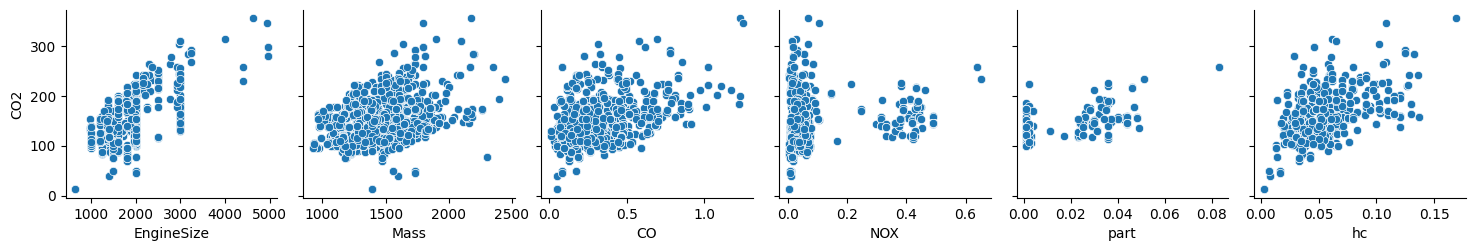

In [10]:
# plot all possible scatter diagrams
features = ['EngineSize', 'Mass', 'CO', 'NOX', 'part', 'hc']
sns.pairplot(cars_data_clean, x_vars=features, y_vars=['CO2']);

`EngineSize` and `Mass` are both displaying some association.

# Building a model (1): Using ALL the data

## Performing the training-test split
The code in the box below:
* Defines the target feature and sets this to `y`.
* Defines the possible input features as the *array* `X`.
* Performs the *training-testing split* (with 80% of the data used for training).
* Displays the size of the four objects created (this is not necessary but is useful for checking).

In [11]:
# create a list for the target and define y
target = 'CO2'
y = cars_data_clean[target]

# create an array of all the input features and define the X
all_features = ['EngineSize', 'Mass', 'CO', 'NOX', 'part', 'hc']
X = cars_data_clean[all_features]

# perform the training-testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# display the length of the lists to check 
print("Size of X_train: ",X_train.shape)
print("Length of y_train: ",len(y_train))
print("Size of X_test: ",X_test.shape)
print("Length of y_test: ",len(y_test))

Size of X_train:  (2986, 6)
Length of y_train:  2986
Size of X_test:  (747, 6)
Length of y_test:  747


## Building a linear model using `EngineSize`
The code in the box below:
* Defines the `input_features`, i.e. the $x$.
* Creates the model: it finds the best values of $m$ and $c$ using the `LinearRegression().fit` command from the *sklearn* machine learning library.
* Displays the values of $m$ and $c$.
* Uses the model to create a list of predictions for the new data set.
* Displays the values of $RMSE$ and $R^2$ by comparing the predictions to the true values from the new data set. 

In [12]:
# Define the input features
input_features = ['EngineSize']

# create the model
linear_model = LinearRegression().fit(X_train[input_features], y_train)

# display the parameters - output the coefficients and y-intercept
print('Coefficients: ', linear_model.coef_)
print('Intercept: ', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(X_test[input_features])

# give the RMSE and R² scoreMSE for the predictions
print('RMSE: ',mean_squared_error(y_test, y_pred, squared=False))
print('R²: ',100*r2_score(y_test, y_pred))

Coefficients:  [0.03803397]
Intercept:  74.72217159298
RMSE:  31.404300466012632
R²:  19.6993734745318


## Building a linear model using `Mass`
> Copy and paste the model below to build a model using `Mass` as the input.

In [13]:
# Build and measure a model for mass.
# Define the input features
input_features = ['Mass']

# create the model
linear_model = LinearRegression().fit(X_train[input_features], y_train)

# display the parameters - output the coefficients and y-intercept
print('Coefficients: ', linear_model.coef_)
print('Intercept: ', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(X_test[input_features])

# give the RMSE and R² scoreMSE for the predictions
print('RMSE: ',mean_squared_error(y_test, y_pred, squared=False))
print('R²: ',100*r2_score(y_test, y_pred))

Coefficients:  [0.03597133]
Intercept:  86.84454604172413
RMSE:  34.18636917252365
R²:  4.841707105505721


You should get a model of $y=0.0359x+86.8$ with $RMSE=34.2$ and $R^2=4.8$%.

## Building a linear model using `EngineSize` and `Mass`
You can build a linear regression model that has multliple input features. To do this for engine size and mass you would use the code: 
`input_features=['EngineSize','Mass']`

In [14]:
# Build a model using engine size and mass
# Define the input features
input_features = ['Mass','EngineSize']

# create the model
linear_model = LinearRegression().fit(X_train[input_features], y_train)

# display the parameters - output the coefficients and y-intercept
print('Coefficients: ', linear_model.coef_)
print('Intercept: ', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(X_test[input_features])

# give the RMSE and R² scoreMSE for the predictions
print('RMSE: ',mean_squared_error(y_test, y_pred, squared=False))
print('R²: ',100*r2_score(y_test, y_pred))

Coefficients:  [-0.01669721  0.04414999]
Intercept:  88.05457766652991
RMSE:  31.223084345209575
R²:  20.62343692366784


# Exploratory data analysis (2)

## Exploring possible slices
There are various categorical features in the data set. You can explore if there is a difference in CO<sub>2</sub> emissions for different groups of the cars by plotting scatter diagrams with a third, categorical feature. The features explored here are `PropulsionType` and `YearRegistered`. The scatter diagrams for both `Mass` and `EngineSize` are plotted for each of these.

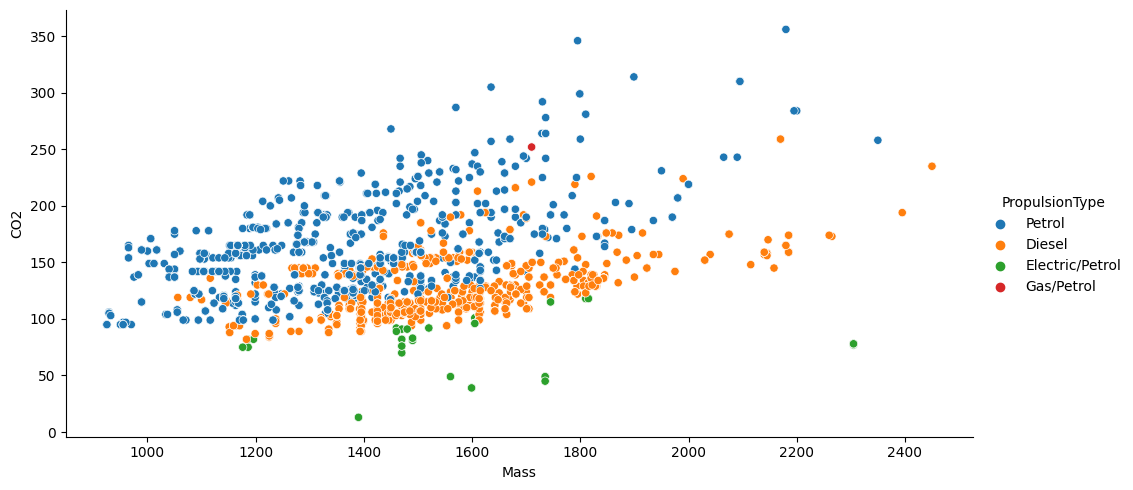

In [15]:
sns.relplot(data=cars_data_clean, x="Mass", y="CO2", hue="PropulsionType", aspect=2);

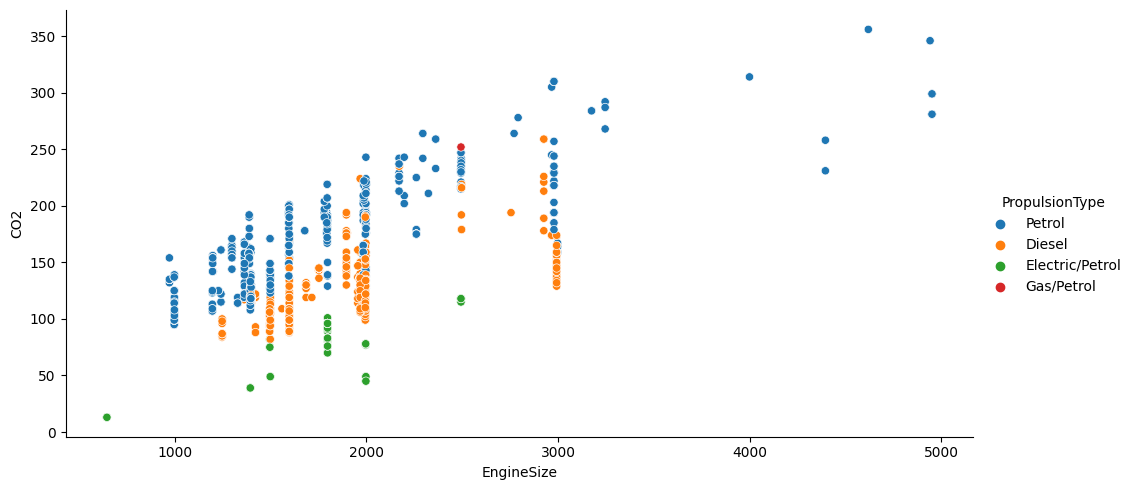

In [16]:
# plot a scatter diagram with a third variable for hue
sns.relplot(data=cars_data_clean, x="EngineSize", y="CO2", hue="PropulsionType", aspect=2);

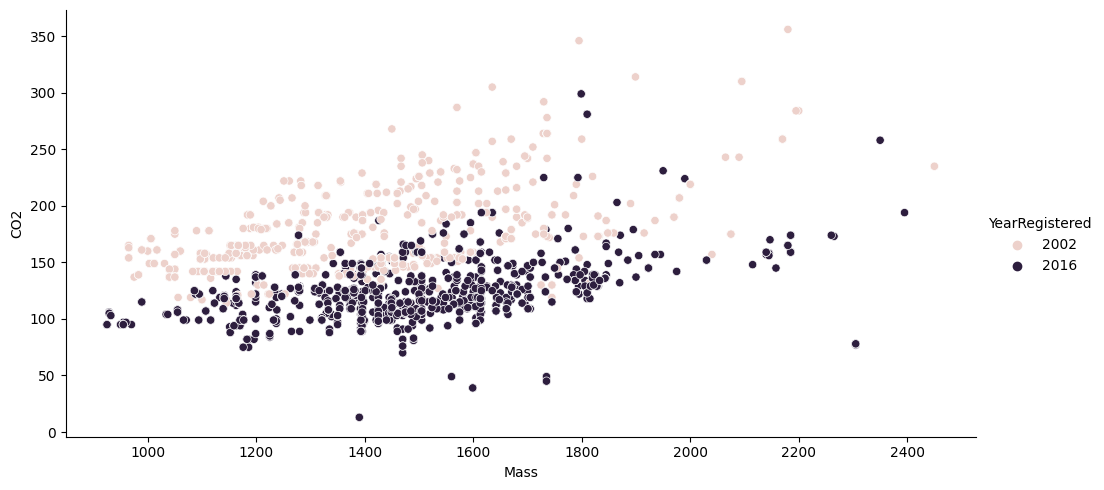

In [17]:
sns.relplot(data=cars_data_clean, x="Mass", y="CO2", hue="YearRegistered", aspect=2);

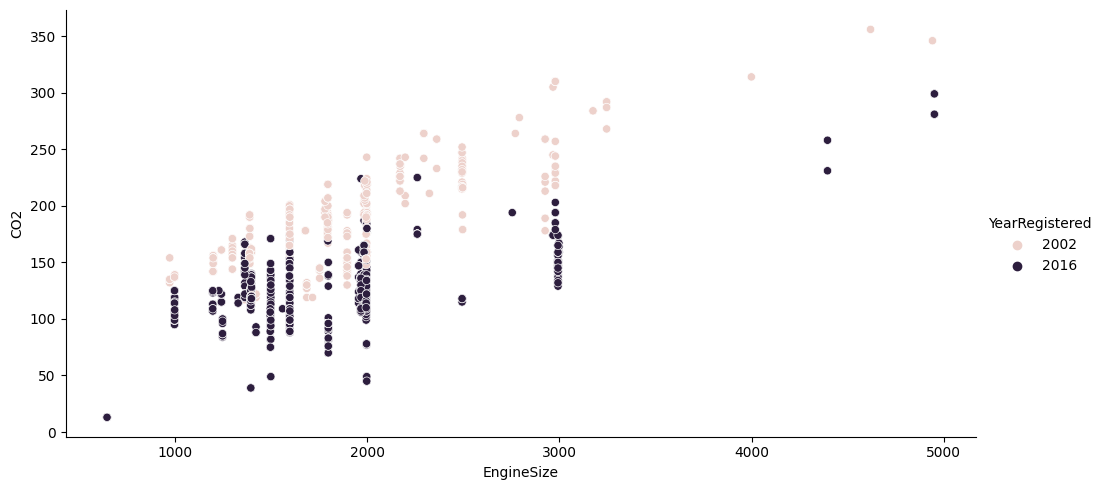

In [18]:
sns.relplot(data=cars_data_clean, x="EngineSize", y="CO2", hue="YearRegistered", aspect=2);

# Pre-processing the data (2)

## Creating a slice for petrol cars from 2016
Both `PropulsionType` and `YearRegistered` appear to be distinct on these diagrams. You can take a slice of the data for the petrol cars from 2016 and build a model based on this subset of the data.

In [19]:
# create a new data set called petrol_data where the PropulsionType value is 'Petrol'
# adding .copy() tells pandas to create a copy - this is not essential in this example but is good practice in general when "slicing" a data set.
petrol_16_data = cars_data_clean[
    (cars_data_clean["PropulsionType"] == "Petrol")
    & (cars_data_clean["YearRegistered"] == 2016)
].copy()

# display the data set to show that it has been created correctly
petrol_16_data


,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
1,1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.797111,Petrol
2,3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NaN,0.048,0.348442,Petrol
3,1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NaN,0.051,0.968447,Petrol
6,1323,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.526516,Petrol
7,1396,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.691727,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,3379,VAUXHALL,1,14,North West,1,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.700035,Petrol
3819,1903,VOLKSWAGEN,1,13,London,1,1197,2016,1139,109,0.199,0.018,NaN,0.035,0.078803,Petrol
3820,2913,FORD,1,5,North West,1,4951,2016,1799,299,0.621,0.018,NaN,0.046,0.787504,Petrol
3824,3498,FORD,1,14,South West,1,999,2016,1333,108,0.447,0.030,0.002,0.076,0.736612,Petrol


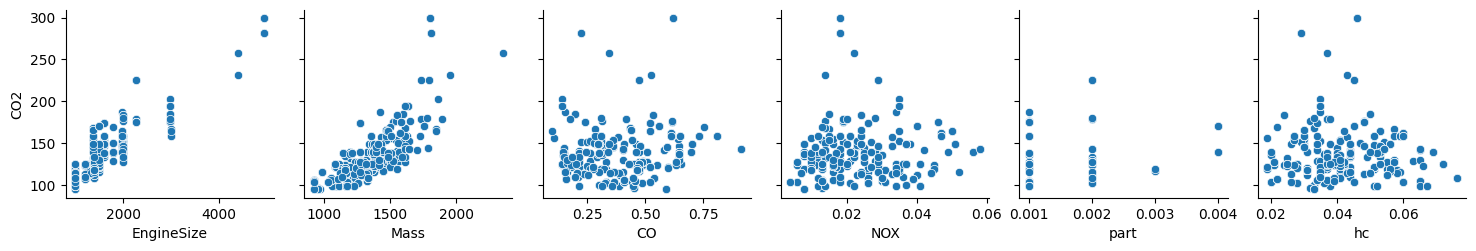

In [20]:
# plot all possible scatter diagrams
features = ['EngineSize', 'Mass', 'CO', 'NOX', 'part', 'hc']
sns.pairplot(petrol_16_data, x_vars=features, y_vars=['CO2']);

# Building a model (2): Using the data for petrol cars from 2016

## Performing the training-test split

In [21]:
# create a list for the target and define y
target = 'CO2'
y = petrol_16_data[target]

# create an array of all the input features and define the X
all_features = ['EngineSize', 'Mass', 'CO', 'NOX', 'part', 'hc']
X = petrol_16_data[all_features]

# peform the training-testing split
X_petrol_train, X_petrol_test, y_petrol_train, y_petrol_test = train_test_split(X, y, train_size=0.8, random_state=1)

# display the length of the lists to check 
print("Size of X_petrol_train: ",X_petrol_train.shape)
print("Length of y_petrol_train: ",len(y_petrol_train))
print("Size of X_petrol_test: ",X_petrol_test.shape)
print("Length of y_petrol_test: ",len(y_petrol_test))

Size of X_petrol_train:  (1050, 6)
Length of y_petrol_train:  1050
Size of X_petrol_test:  (263, 6)
Length of y_petrol_test:  263


## Building a linear model using `EngineSize`
The code in the box below creates and measures a linear model based on `EngineSize` for the petrol data from 2016.

In [22]:
# Define the input features
input_features = ['EngineSize']

# create the model
linear_model = LinearRegression().fit(X_petrol_train[input_features], y_petrol_train)

# display the parameters - output the coefficients and y-intercept
print('Coefficients: ', linear_model.coef_)
print('Intercept: ', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(X_petrol_test[input_features])

# give the RMSE and R² score for the predictions
print('RMSE: ',mean_squared_error(y_petrol_test, y_pred, squared=False))
print('R²: ',100*r2_score(y_petrol_test, y_pred))

Coefficients:  [0.04582722]
Intercept:  62.39943421147481
RMSE:  13.193260356049782
R²:  65.18728834827785


## Building a linear model using `Mass`


In [23]:
# Build a model using mass for petrol cars from 2016.

## Building a linear model using `EngineSize` and `Mass`

In [24]:
# Build a model using mass and engine size for petrol cars from 2016.

# Pre-processing the data(3)

## Creating a slice for diesel cars from 2016
You can now explore the data for diesel cars from 2016.

In [25]:
# create a new data set called petrol_data where the PropulsionType value is 'Petrol'
# adding .copy() tells pandas to create a copy - this is not essential in this example but is good practice in general when "slicing" a data set.
diesel_16_data = cars_data_clean[
    (cars_data_clean["PropulsionType"] == "Diesel")
    & (cars_data_clean["YearRegistered"] == 2016)
].copy()

# display the data set to show that it has been created correctly
diesel_16_data

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
4,2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NaN,NaN,0.178227,Diesel
5,2216,FORD,2,6,South West,5,1499,2016,1425,98,0.354,0.074,NaN,NaN,0.423774,Diesel
9,2971,VOLKSWAGEN,2,6,South West,5,2967,2016,2185,174,0.138,0.039,NaN,NaN,0.225134,Diesel
11,2707,FORD,2,14,North West,5,1499,2016,1399,98,0.354,0.074,NaN,NaN,0.853962,Diesel
12,2419,VAUXHALL,2,6,South West,5,1598,2016,1393,89,0.268,0.047,NaN,NaN,0.149359,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,2125,BMW,2,14,South West,5,1995,2016,1425,114,0.248,0.028,NaN,NaN,0.585534,Diesel
3815,2712,BMW,2,14,South West,5,1995,2016,1450,110,0.169,0.029,NaN,NaN,0.322555,Diesel
3822,2920,FORD,2,14,North West,5,1997,2016,1681,122,0.145,0.059,0.001,NaN,0.946550,Diesel
3823,1800,FORD,2,96,London,2,1997,2016,1833,134,0.305,0.054,NaN,NaN,0.538774,Diesel


# Building a model (3): Using the data for diesel cars from 2016

In [26]:
# create a list for the target and define y
target = 'CO2'
y = diesel_16_data[target]

# create an array of all the input features and define the X
all_features = ['EngineSize', 'Mass', 'CO', 'NOX', 'part', 'hc']
X = diesel_16_data[all_features]

# peform the training-testing split
X_diesel_train, X_diesel_test, y_diesel_train, y_diesel_test = train_test_split(X, y, train_size=0.8, random_state=1)

# display the length of the lists to check 
print("Size of X_diesel_train: ",X_diesel_train.shape)
print("Length of y_diesel_train: ",len(y_diesel_train))
print("Size of X_diesel_test: ",X_diesel_test.shape)
print("Length of y_diesel_test: ",len(y_diesel_test))

Size of X_diesel_train:  (876, 6)
Length of y_diesel_train:  876
Size of X_diesel_test:  (220, 6)
Length of y_diesel_test:  220


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fa0672f2-d1a2-409c-8b8e-69e05dfe2189' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>